In [5]:
import pandas as pd
import numpy as np
import csv
import os
import random
import re
import requests
import xlrd
import matplotlib.pyplot as plt
import math

In [6]:
#----------读入市场指数表现---------
stk = pd.read_excel('SZ.xlsx',encoding = 'gbk')

In [7]:
#----------爬取关键词“基金”的搜索热度---------
import gopup as gp
# cookie中填写登录百度指数页面的cookie值
cookie ='CHKFORREG=8bfef5dda9780c35cd31dd2927d3900b; BIDUPSID=95952B9E39518700C9DA515A12273352; PSTM=1539784779; BAIDUID=0759A9C7F973AE0A9E435321A1BC04C7:FG=1; Hm_lvt_d101ea4d2a5c67dab98251f0b5de24dc=1611128864; bdindexid=oot61u7bflbh5i8hbiff0djsg1; CHKFORREG=8bfef5dda9780c35cd31dd2927d3900b; Hm_lpvt_d101ea4d2a5c67dab98251f0b5de24dc=1611129443; BDUSS=Fc2LXZ2V09pWW0tU0JTT0I0RjRqNjB5TDl4eH5NcjZIQm1TQUE3Sk5qeH5ieTlnSVFBQUFBJCQAAAAAAQAAAAEAAABfX9EeAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH~iB2B~4gdgT; __yjsv5_shitong=1.0_7_41a6574409eafac34121c069aec5aeb4d595_300_1611129472367_222.68.18.122_9de80870; RT="z=1&dm=baidu.com&si=wnbdswvojq&ss=kk54iyo8&sl=c&tt=7mm&bcn=https%3A%2F%2Ffclog.baidu.com%2Flog%2Fweirwood%3Ftype%3Dperf"'
bd = gp.baidu_search_index(word='基金', start_date='2020-01-01',end_date='2020-12-31', cookie=cookie)

In [8]:
# 合并两个序列
bd=bd.reset_index()
res=pd.merge(stk,bd,how='left',on='date')
res.set_index(['date'], inplace=True)
res=res[['000001.SZ','基金']]

#----------标准化处理----------
# x剔除序列为上证指数；期望序列d为搜索热度
res.columns=['pre_x','pre_d']
res['x'] = (res['pre_x']-res['pre_x'].mean())/(res['pre_x'].std())  
res['d'] = (res['pre_d']-res['pre_d'].mean())/(res['pre_d'].std())  
res=res.reset_index()

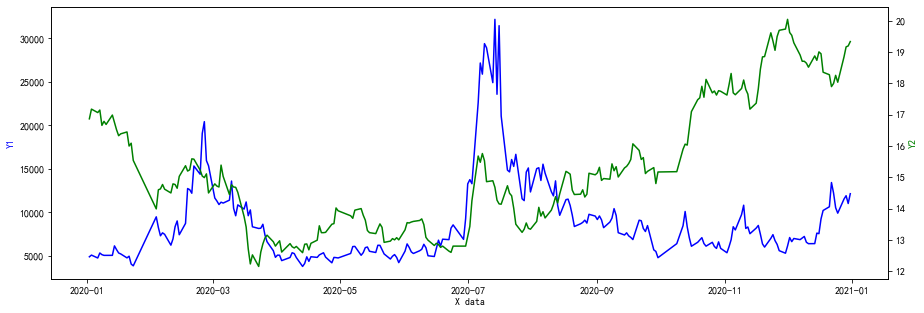

In [9]:
#----------上证指数与搜索热度 原始序列绘图----------
fig, ax1 = plt.subplots(figsize=(15,5))
ax2 = ax1.twinx()
ax1.plot(res['date'],res['pre_d'],'b-')
ax2.plot(res['date'],res['pre_x'],'g-')
ax1.set_xlabel("X data")
ax1.set_ylabel("Y1",color='b')
ax2.set_ylabel("Y2",color='g')
plt.show()

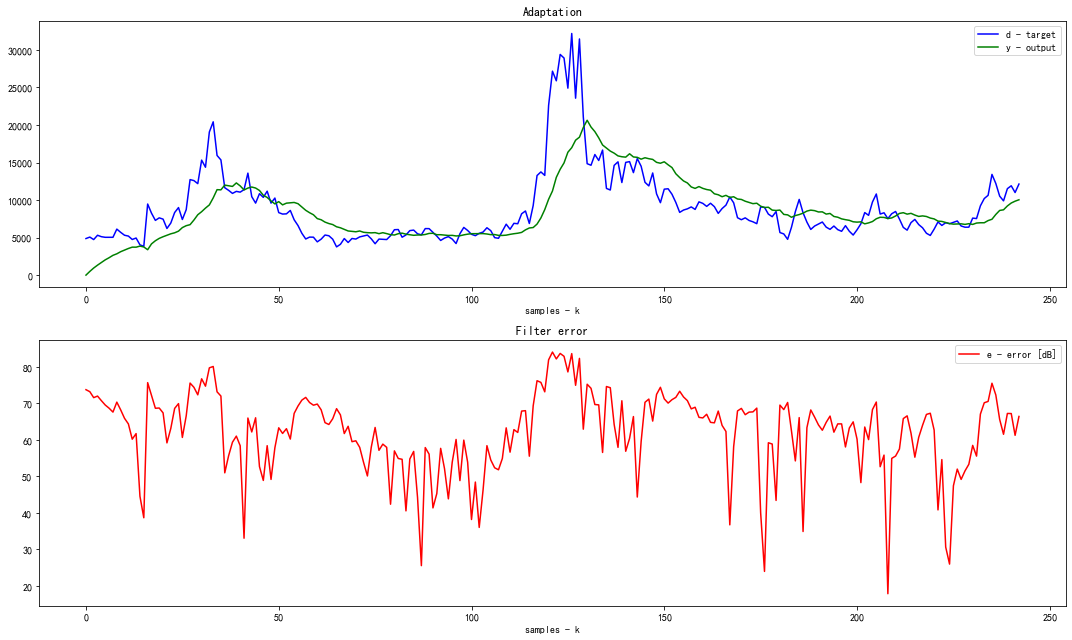

In [10]:
#----------未标准化----------
import padasip as pa

# creation of data
x = res['pre_x']
x=np.matrix(x)
x=x.T # input matrix
d = res['pre_d'] # target

# identification
f = pa.filters.AdaptiveFilter(model="NLMS", n=1, mu=0.1, w="random")
y, e, w = f.run(d, x)

# show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(d,"b", label="d - target")
plt.plot(y,"g", label="y - output");plt.legend()

#----------过滤后的百度热度----------
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(10*np.log10(e**2),"r", label="e - error [dB]");plt.legend()
plt.tight_layout()
plt.show()

C:\Users\19388\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\19388\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


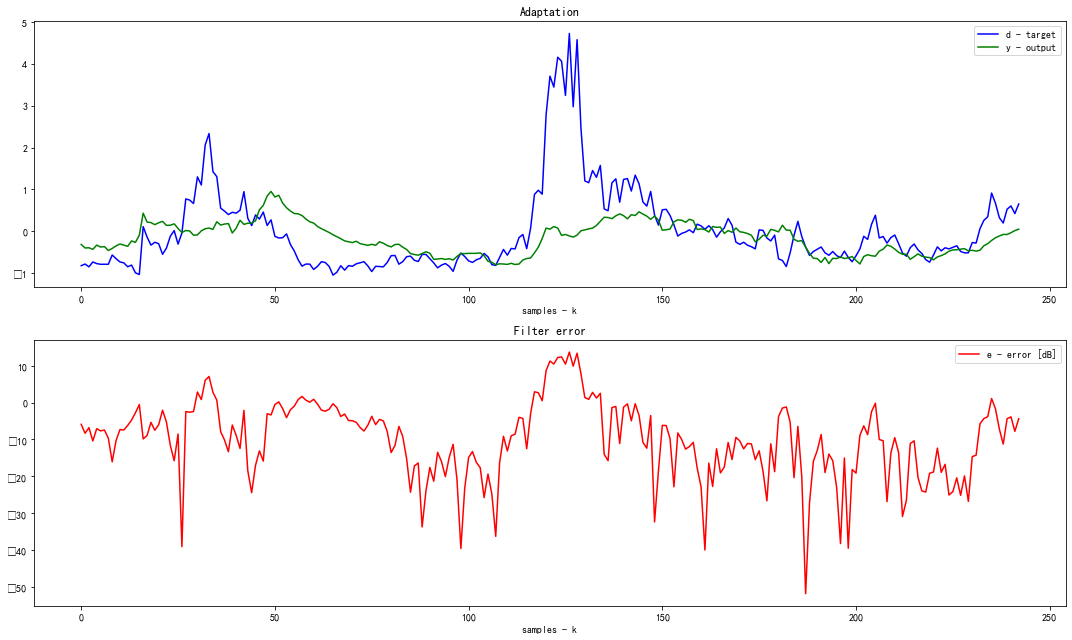

In [11]:
#----------标准化----------

# creation of data
x = res['x']
x=np.matrix(x)
x=x.T # input matrix
d = res['d'] # target

# identification
f = pa.filters.AdaptiveFilter(model="NLMS", n=1, mu=0.1, w="random")
y, e, w = f.run(d, x)

# show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(d,"b", label="d - target")
plt.plot(y,"g", label="y - output");plt.legend()

#----------过滤后的百度热度----------
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(10*np.log10(e**2),"r", label="e - error [dB]");plt.legend()
plt.tight_layout()
plt.show()

In [14]:
#----------读取股票池代码（存储在box中）----------
box=pd.read_excel('stock.xlsx',encoding = 'gbk')
stklist=box['代码']

#----------批量爬取个股搜索热度----------
# 此处直接对stjlist赋值，用于举例
stklist=['海康威视','贵州茅台','指数基金']
cookie ='CHKFORREG=8bfef5dda9780c35cd31dd2927d3900b; BIDUPSID=95952B9E39518700C9DA515A12273352; PSTM=1539784779; BAIDUID=0759A9C7F973AE0A9E435321A1BC04C7:FG=1; Hm_lvt_d101ea4d2a5c67dab98251f0b5de24dc=1611128864; bdindexid=oot61u7bflbh5i8hbiff0djsg1; CHKFORREG=8bfef5dda9780c35cd31dd2927d3900b; Hm_lpvt_d101ea4d2a5c67dab98251f0b5de24dc=1611129443; BDUSS=Fc2LXZ2V09pWW0tU0JTT0I0RjRqNjB5TDl4eH5NcjZIQm1TQUE3Sk5qeH5ieTlnSVFBQUFBJCQAAAAAAQAAAAEAAABfX9EeAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH~iB2B~4gdgT; __yjsv5_shitong=1.0_7_41a6574409eafac34121c069aec5aeb4d595_300_1611129472367_222.68.18.122_9de80870; RT="z=1&dm=baidu.com&si=wnbdswvojq&ss=kk54iyo8&sl=c&tt=7mm&bcn=https%3A%2F%2Ffclog.baidu.com%2Flog%2Fweirwood%3Ftype%3Dperf"'
tol=pd.date_range('2020/1/1','2020/12/31', freq='D')
tol=[]
for i in stklist:
    bd = gp.baidu_search_index(word=i, start_date='2020-01-01', end_date='2020-12-31', cookie=cookie)
    tol.append(bd[i])

tol = np.array(tol)   
tol = pd.DataFrame(tol) 
tol.columns=pd.date_range('2020/1/1','2020/12/31', freq='D').strftime("%Y%m%d")
tol.index=stklist
tol

,20200101,20200102,20200103,20200104,20200105,20200106,20200107,20200108,20200109,20200110,...,20201222,20201223,20201224,20201225,20201226,20201227,20201228,20201229,20201230,20201231
海康威视,5465,11432,10245,6246,5454,10608,10175,9641,9919,9153,...,10132,10796,10231,9714,6113,5192,9947,9755,9854,9284
贵州茅台,3265,11299,12676,4847,4236,8402,7020,6347,6231,6135,...,8555,9757,9378,9154,3378,2857,6516,5351,6168,7509
指数基金,1108,1707,1441,1072,1023,1409,1585,1488,1484,1457,...,1583,1634,1623,1411,1507,1299,1703,1584,1682,1481
